In [1]:
import pandas as pd
import numpy as np

from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import sys

import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import pickle

In [2]:
from glob import glob

station_names = [file.split("/")[-1][:5] for file in glob("./dl_models/*.pkl")]

In [3]:
stations_df = pd.read_csv("../2015-2020-pm25/india_stations-corrected.csv", index_col=0)
bengaluru_stations_df = stations_df.loc[stations_df['StationId'].isin(station_names)]
bengaluru_stations_df

,StationName,StationId,City,Latitude,Longitude
77,"BTM Layout, Bengaluru - CPCB",KA002,Bengaluru,12.916576,77.610116
78,"BWSSB Kadabesanahalli, Bengaluru - CPCB",KA003,Bengaluru,12.960388,77.718993
79,"Bapuji Nagar, Bengaluru - KSPCB",KA004,Bengaluru,12.956780,77.539729
81,"Hebbal, Bengaluru - KSPCB",KA006,Bengaluru,13.035400,77.598800
82,"Hombegowda Nagar, Bengaluru - KSPCB",KA007,Bengaluru,12.937500,77.594900
83,"Peenya, Bengaluru - CPCB",KA009,Bengaluru,13.028513,77.519676
85,"Silk Board, Bengaluru - KSPCB",KA011,Bengaluru,12.917710,77.623786


In [4]:
station_names = bengaluru_stations_df['StationName'].values
lat, lon = bengaluru_stations_df['Latitude'].values, bengaluru_stations_df['Longitude'].values

In [5]:
pkl_obj = pickle.load(open("bengaluru_geodata.pkl", "rb"))
BENGALURU_B_MIN_LON, BENGALURU_B_MAX_LON = pkl_obj['min_lon'], pkl_obj['max_lon']
BENGALURU_B_MIN_LAT, BENGALURU_B_MAX_LAT = pkl_obj['min_lat'], pkl_obj['max_lat']
boundary = pkl_obj['boundary']
mask = pkl_obj['bengaluru_mask']

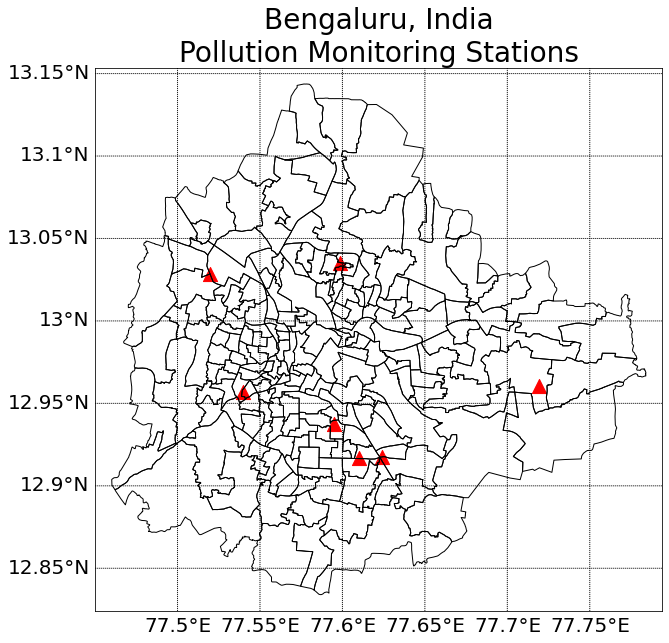

In [6]:
fig = plt.figure(figsize=(20, 10))
ax  = fig.gca()
    
pad = 0.01

m = Basemap(projection='cyl', resolution='l', llcrnrlat=BENGALURU_B_MIN_LAT-pad, urcrnrlat=BENGALURU_B_MAX_LAT+pad, llcrnrlon=BENGALURU_B_MIN_LON-pad, urcrnrlon=BENGALURU_B_MAX_LON+pad , suppress_ticks=True)

m.readshapefile("../Municipal_Spatial_Data/Bengaluru/Bengaluru",'Bengaluru', linewidth=1)

m.drawparallels(np.arange(-90., 120., 0.05), labels=[1, 0, 0, 0], fontsize=20)
m.drawmeridians(np.arange(-180., 181., 0.05), labels=[0, 0, 0, 1],  fontsize=20)

X, Y = m(lon, lat)
ax.scatter(X, Y, c='r', s=200, marker="^")

# for i, (x, y) in enumerate(zip(X, Y)):
#     ax.annotate(station_names[i], (x,y), xytext=(5, 5), fontsize=10, textcoords='offset points')


plt.title('Bengaluru, India\nPollution Monitoring Stations', fontsize=28)

plt.show()
pngfile = 'Bengaluru_Stations.png'
fig.savefig(pngfile, bbox_inches="tight", dpi=400)